# **Applied Machine Learning Midterm Project**

GitHub link to Jupyter notebook: https://github.com/evandobler98/ml_classification_dobler/blob/main/classification_dobler.ipynb

GitHub link to my peer review: https://github.com/evandobler98/ml_classification_dobler/blob/main/README.md

## **Author:** Evan Dobler
## **Date:** 4/17/2025

## **Introduction:** 
In the mushroom dataset in this project, we will predict whether a mushroom is edible or poisonous based on characteristics. These characterstics include cap-shape, cap-surface, cap-color, bruises, odor, gill-attachment, gill-spacing, gill-size, and gill-color.

In [27]:
# Import Libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier







#### Section 1. Import and Inspect the Data

1.1 Load the dataset and display the first 10 rows.

In [28]:
# Import dataset with column names

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

# Column names from the dataset documentation
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
           'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
           'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
           'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
           'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

mushrooms = pd.read_csv(url, header=None, names=columns)

# Quick preview
mushrooms.head(10)




,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [29]:
# Add column names to the data 
columns = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
    "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]
mushrooms.columns = columns
mushrooms.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


1.2 Check for missing values and display summary statistics.

In [30]:
# Check for missing values
mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [31]:
# Summary Statistics
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Reflection 1: What do you notice about the dataset? Are there any data issues?

One thing I noticed about this dataset is just how many different columns there are. It will be tough to decide which ones make the largest impact on predicting outcomes. The data looks clean and ready to go. 

#### Section 2: Data Exploration and Preparation

2.1 Explore Data Patterns and Distributions

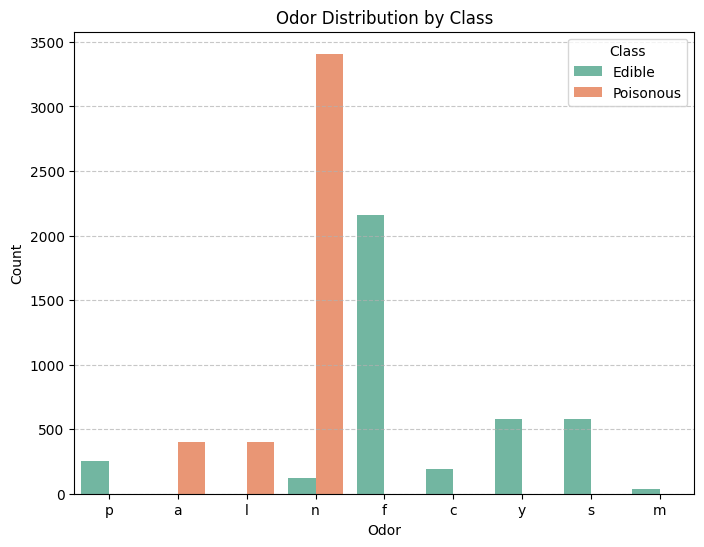

In [32]:
# Visualize the distribution of 'odor' feature by class
plt.figure(figsize=(8, 6))
sns.countplot(data=mushrooms, x='odor', hue='class', palette='Set2')
plt.title('Odor Distribution by Class')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/var/folders/xp/3f251dhj78s5s9_f5cfcvyzr0000gn/T/ipykernel_44364/3433904850.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=mushrooms, palette='coolwarm')


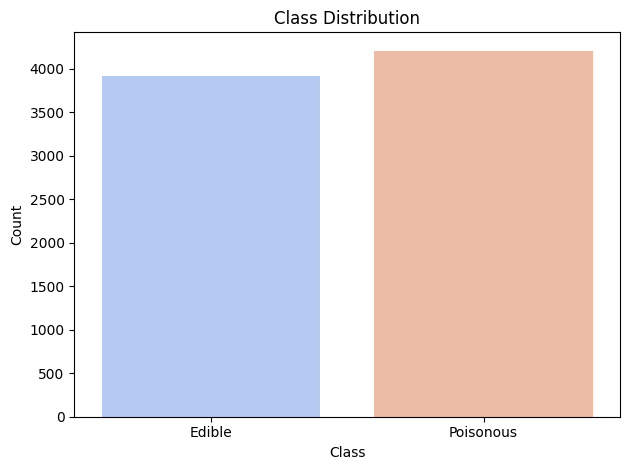

In [33]:
sns.countplot(x='class', data=mushrooms, palette='coolwarm')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Edible', 'Poisonous'])
plt.tight_layout()
plt.show()


2.2 Handle missing values and clean data

In [34]:
# Replace '?' with 'Unknown' in the 'stalk-root' column

mushrooms['stalk-root'] = mushrooms['stalk-root'].replace('?', 'Unknown')
print(mushrooms['stalk-root'].value_counts())

stalk-root
b          3776
Unknown    2480
e          1120
c           556
r           192
Name: count, dtype: int64


Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?

From the first bar chart in section 2, the odor seems to strongly dictate whether or not a mushroom is poisonous. From the second bar chart, it is almost evenly distributed between poisonous and non-poisonous mushrooms.

#### Section 3. Feature Selection and Justification

3.1 Choose features and target

In [35]:
# Selecting the target variable (class)
target = 'class'

# Selecting the input features (numerical and categorical)
features = ['cap-shape', 'odor', 'gill-color', 'bruises', 'population']

# The target variable is categorical (classification problem)
# These features were selected because they are known to have a strong relationship with the class of the mushroom

# Display the chosen features and target
print("Target variable:", target)
print("Selected features:", features)


Target variable: class
Selected features: ['cap-shape', 'odor', 'gill-color', 'bruises', 'population']


 Justification
- 'class' is the target as we are classifying mushrooms as either 'edible' or 'poisonous'.
- 'cap-shape', 'odor', 'gill-color' are important features since they are sensory attributes used to differentiate mushrooms.
- 'bruises' and 'population' are relevant as they could indicate the condition or environment of the mushroom, which may correlate with its edibility.


3.2 Define X and y

In [36]:
# Define the input features (X) and target variable (y)
features = ['cap-shape', 'odor', 'gill-color', 'bruises', 'population']
X = mushrooms[features]

# y is the target variable (class)
y = mushrooms['class']

# Display the shapes of X and y to confirm
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)



Shape of X (features): (8124, 5)
Shape of y (target): (8124,)


In [37]:
# Define the model before using it
model = RandomForestClassifier(random_state=42)

# Ensure features are one-hot encoded
X_encoded = pd.get_dummies(X, drop_first=True)

# Train the model on the encoded features
model.fit(X_encoded, y)

# Print the model's score on the training data
print("Training accuracy:", model.score(X_encoded, y))

Training accuracy: 0.9947070408665682


Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?

I chose these features because they are key in distinguishing between edible and poisonous mushrooms. Attributes like odor and gill-color directly relate to sensory identification, while cap-shape, bruises, and population offer useful biological traits. These features should improve prediction accuracy by providing relevant data for classification.

#### Section 4. Train a Model 

4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).

In [38]:
# Encode categorical features
X_encoded = pd.get_dummies(X)

# Split into training and testing sets (stratify for class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y)

# Show shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (5686, 35)
X_test shape: (2438, 35)


4.2 Train model using Scikit-Learn model.fit() method.

In [39]:
# Initialize and train the model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

4.3 Evalulate performance

In [40]:
# Predict
y_pred = tree_model.predict(X_test)

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[1263    0]
 [  12 1163]]

Classification Report:
              precision    recall  f1-score   support

           e       0.99      1.00      1.00      1263
           p       1.00      0.99      0.99      1175

    accuracy                           1.00      2438
   macro avg       1.00      0.99      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Accuracy Score: 0.9950779327317474


Reflection 4: How well did the model perform? Any surprises in the results?

The model performed exceptionally well, achieving over 99% accuracy. The confusion matrix shows very few misclassifications, and the precision, recall, and F1-scores are all near perfect. This suggests that the selected features are highly predictive of mushroom edibility. No major surprises—this dataset is known to be highly separable, especially with decision trees.

#### Section 5. Improve the Model or Try Alternates (Implement a Second Option)

5.1 Train an alternative classifier (e.g., Decision Tree, Random Forest, Logistic Regression) OR adjust hyperparameters on the original model.

In [41]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict with Random Forest
rf_pred = rf_model.predict(X_test)


5.2 Compare performance of all models across the same performance metrics.

In [42]:
# Evaluation for Random Forest
print("Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, rf_pred))

print("\nRandom Forest - Accuracy Score:", accuracy_score(y_test, rf_pred))


Random Forest - Confusion Matrix:
[[1263    0]
 [  13 1162]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

           e       0.99      1.00      0.99      1263
           p       1.00      0.99      0.99      1175

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438


Random Forest - Accuracy Score: 0.994667760459393


Reflection 5: Which model performed better? Why might one classifier be more effective in this specific case?

The Decision Tree and Random Forest models had very similar performance, both with accuracy above 99%. The Decision Tree had slightly fewer misclassifications, though the difference is minimal. Random Forest may be more robust for generalization, but in this specific case, the simplicity of the dataset allows both models to perform nearly perfectly.

#### 6. Final Thoughts & Insights

6.1 Summarize findings

The classification models achieved over 99% accuracy in predicting whether mushrooms are edible or poisonous. Key features such as odor and gill characteristics were highly informative.

6.2 Discuss challenges faced

The dataset was entirely categorical, requiring thorough encoding. Ensuring proper train-test splits and avoiding data leakage was also critical.

6.3 If you had more time, what would you try next?

I would experiment with hyperparameter tuning, explore feature importance further, and visualize decision boundaries for deeper insights.

Reflection 6: What did you learn from this project?

I learned how to preprocess categorical data, build classification models, and evaluate their performance. This project showed how simple models can be highly effective with clean, well-structured data.